In [1]:
#importing libraries for data processing and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#importing libraties for machiene learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing  import StandardScaler
from sklearn.preprocessing import LabelEncoder

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#full displçay of columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)



## IMPORTING OUR 'CONSUMER ELETRONIC SALES DATASET'


In [2]:
df = pd.read_csv("/kaggle/input/consumer-electronics-sales-dataset/consumer_electronics_sales_data.csv")

## Check the data set


In [3]:
df.head()

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
0,5874,Smartphones,Other Brands,312.949668,18,0,2,1,0
1,5875,Smart Watches,Samsung,980.389404,35,1,7,2,1
2,5876,Tablets,Samsung,2606.718293,63,0,1,5,1
3,5877,Smartphones,Samsung,870.395450,63,1,10,3,1
4,5878,Tablets,Sony,1798.955875,57,0,17,3,0


In [4]:
df.tail()

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
8995,14869,Smart Watches,Samsung,1041.149163,36,1,16,4,0
8996,14870,Smartphones,Samsung,1485.694311,57,0,5,1,1
8997,14871,Headphones,Samsung,2887.369597,28,0,18,4,0
8998,14872,Tablets,HP,1490.453964,38,0,4,2,1
8999,14873,Smartphones,Sony,2315.583087,62,0,15,2,1


# EXPLORATORY DATA ANALYSIS (EDA)

## SHAPE OF DATA


In [5]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} colomns.") 

The dataset has 9000 rows and 9 colomns.


## INFO OF DATASET


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductID             9000 non-null   int64  
 1   ProductCategory       9000 non-null   object 
 2   ProductBrand          9000 non-null   object 
 3   ProductPrice          9000 non-null   float64
 4   CustomerAge           9000 non-null   int64  
 5   CustomerGender        9000 non-null   int64  
 6   PurchaseFrequency     9000 non-null   int64  
 7   CustomerSatisfaction  9000 non-null   int64  
 8   PurchaseIntent        9000 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 632.9+ KB


## DESCRIPTIVE ANALYSIS


In [7]:
df.describe()

,ProductID,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,10373.500000,1527.429195,43.347000,0.508889,10.054667,2.996000,0.566444
std,2598.220545,829.900898,15.055084,0.499949,5.461328,1.405301,0.495593
min,5874.000000,100.376358,18.000000,0.000000,1.000000,1.000000,0.000000
25%,8123.750000,809.165014,30.000000,0.000000,5.000000,2.000000,0.000000
50%,10373.500000,1513.024577,43.000000,1.000000,10.000000,3.000000,1.000000
75%,12623.250000,2244.415520,56.000000,1.000000,15.000000,4.000000,1.000000
max,14873.000000,2999.852253,69.000000,1.000000,19.000000,5.000000,1.000000


* `Product Price:`
  * Minimum: 100.38
  * Maximum: 2999.85
  * Average: 1527.43
  
* `Customer Age:`
  * Minimum: 18
  * Maximum: 69
  * Average: 43.35
  
* `Purchase Frequency:`
  * Minimum: 1
  * Maximum: 19
  * Average: 10.1
  
* `Customer Satisfaction:`
  * Minimum: 1
  * Maximum: 5
  * Average: 2.99

## MISSING VALUES

In [8]:

df.isnull().sum()

ProductID               0
ProductCategory         0
ProductBrand            0
ProductPrice            0
CustomerAge             0
CustomerGender          0
PurchaseFrequency       0
CustomerSatisfaction    0
PurchaseIntent          0
dtype: int64

## DUPLICATES

In [9]:
df.duplicated().sum()

0

## VISUALIZATION

In [10]:
df.columns

Index(['ProductID', 'ProductCategory', 'ProductBrand', 'ProductPrice', 'CustomerAge', 'CustomerGender', 'PurchaseFrequency', 'CustomerSatisfaction', 'PurchaseIntent'], dtype='object')

In [11]:
#PRODUCT CATEGORY
plt = px.histogram(df, x='ProductCategory', title="Product Category Distribution", color_discrete_sequence=px.colors.sequential.Cividis)
plt.show()

* We've 5 Product Categories:
  * 1. Smart Phones
  * 2. Smart Watches
  * 3. Taplets
  * 4. Laptops
  * 5. Headphones

## BRANDS

In [12]:
plt = px.histogram(df, x="ProductBrand", title="Product Brand Dristribution", color_discrete_sequence=px.colors.sequential.Aggrnyl)
plt.show()

* We've 4 Brands and 1 is Other Brands:
  * 1. Samsung
  * 2. Sony
  * 3. HP
  * 4. Apple

## PRICE DISTRIBUTION

In [13]:
plt = px.histogram(df, x='ProductPrice', title='Product Price Distribution', color_discrete_sequence=px.colors.sequential.Agsunset)
plt.show()

* Product Price Range: 100.38 - 2999.85
* Products are in Expensive Range.

## AGE DISTRIBUTION

In [14]:
plt = px.histogram(df, x='CustomerAge', title='Customer Age Distribution', color_discrete_sequence=px.colors.sequential.Bluered)
plt.show()

* Age range is 18 - 69

## GENDER DISTRIBUTION

In [15]:
plt = px.pie(df, names='CustomerGender', title='Customer Gender Distribution', color_discrete_sequence=px.colors.sequential.Turbo_r)
plt.show()

* 0 - Male (49.1%)
* 1 - Female (50.9%)

## PURCHASE FREQUENCY DISTRIBUTION

In [16]:
plt = px.histogram(df,x = 'PurchaseFrequency', title='Purchase Frequency Distribution', color_discrete_sequence=px.colors.sequential.haline)
plt.show()

The Range is 1 - 19

## CUSTOMER SATISFACTION DISTRIBUTION

In [17]:
plt = px.histogram(df, x='CustomerSatisfaction', title='Customer SatisfactionDistribution', color_discrete_sequence=px.colors.sequential.Viridis)
plt.show()

* Range is 1 - 5 and average is 3

## PURCHASE INTENT (TARGET VARIABLE) DISTRIBUTION

In [18]:
plt = px.pie(df, names = 'PurchaseIntent', title='Purchase Intent Distributon', color_discrete_sequence = px.colors.sequential.Mint)
plt.show()

We've `0 and 1` which means `Not Purchase` and `Purchase`.

A binary classification problem.

`0: Not Purchase --> 43.4%`

`1: Purchase --> 56.6%`

<h2 style="color: #9ABA49;text-align: center;"> MULTI-VARIATE ANALYSIS</h2>

## Ploting Each Variable Against Target Variable

In [19]:
for col in df.columns:
    plt = px.histogram(df, x=col, color='PurchaseIntent', title=f"{col} Distribution", color_discrete_sequence=px.colors.sequential.Blackbody)
    plt.show()

#### Based on the above ploting of columns against Target Variable

Mosly People From Age 18 to 30 don't purchase maybe due to high price.

Females are the most buyers.

Customer Satisfaction with 4 and 5 are mostly tends to buy.




# PRODUCT VS BRANDS

Let's check Products by Brands to see the distribution.

In [20]:
plt = px.histogram(df, x='ProductCategory', color ='ProductBrand', title='Product Category and Brands Distribution', color_discrete_sequence=px.colors.sequential.Blackbody_r)
plt.show()

# PRODUCT VS PRICE

Product Vs Price is to check the distribution of price.

In [21]:
plt = px.histogram(df, x='ProductPrice', color='ProductCategory', title='Product Category and Price Distribution', color_discrete_sequence=px.colors.sequential.Blackbody)
plt.show()

# BRANDS VS PRICE

Let's check products by brands to see the distribuition

In [22]:
plt = px.histogram(df, x='ProductPrice', color ='ProductBrand', title = 'Product Category and Price Distribution', color_discrete_sequence=px.colors.sequential.Blackbody)
plt.show()

All brands offer the almost same price range.

## AGE vs PRODUCT CATEGORY and PRICE

In [23]:
plt = px.histogram(df, x = 'CustomerAge', y = 'ProductPrice', color = 'ProductCategory', title='Customer Age Product Category Distribution')
plt.show()

Based on the above figure, customers from all age group buy all the products available in this dataset, which means that age does not matter.

## HEATMAP | CORRELATION MATRIX

Some of the features are categorical ad some are numerical. So, we need to encode them.

### ENCODING CATEGORICAL DATA

In [24]:
df.head()

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
0,5874,Smartphones,Other Brands,312.949668,18,0,2,1,0
1,5875,Smart Watches,Samsung,980.389404,35,1,7,2,1
2,5876,Tablets,Samsung,2606.718293,63,0,1,5,1
3,5877,Smartphones,Samsung,870.395450,63,1,10,3,1
4,5878,Tablets,Sony,1798.955875,57,0,17,3,0


In [25]:
le = LabelEncoder()
df['ProductCategory'] = le.fit_transform(df['ProductCategory'])
df['ProductBrand'] = le.fit_transform(df['ProductBrand'])

In [26]:
df.head()

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
0,5874,3,2,312.949668,18,0,2,1,0
1,5875,2,3,980.389404,35,1,7,2,1
2,5876,4,3,2606.718293,63,0,1,5,1
3,5877,3,3,870.395450,63,1,10,3,1
4,5878,4,4,1798.955875,57,0,17,3,0


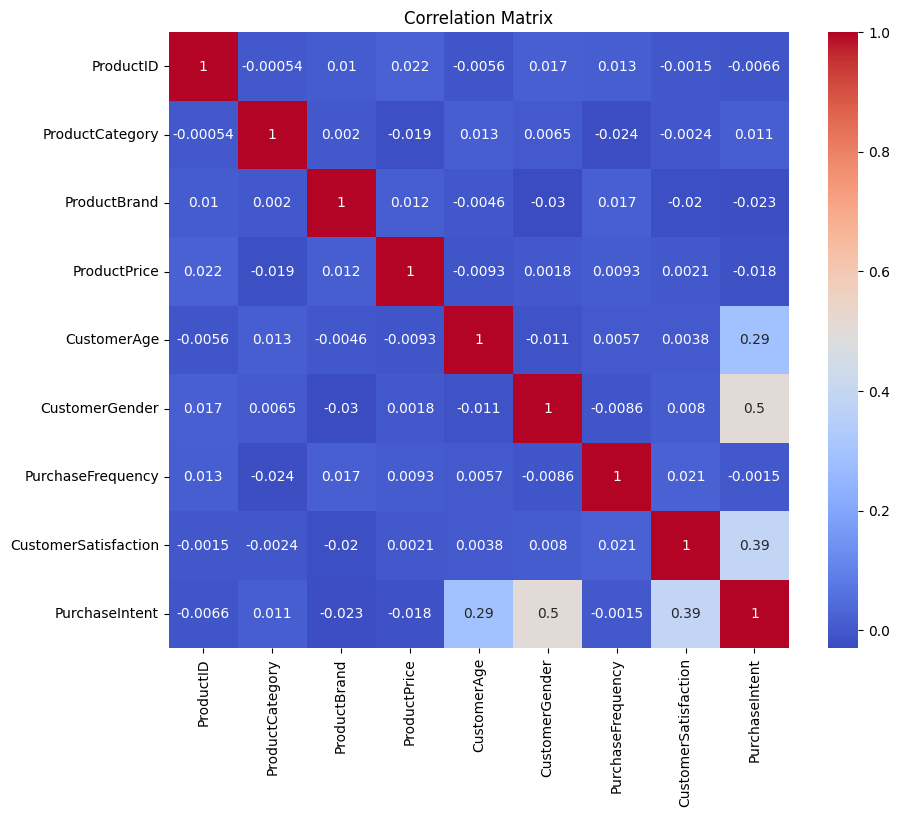

In [27]:
import matplotlib.pyplot as plt
#Correlation matrix and heatmap
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Correlation is a statistical measure that indicates the strength and direction of mthe linear relationship between two variables:

-1: Perfect negatie correlation (as one variabel increses, the other decreases)


0: Nocorrelation (independent variables)


1: Perfect positive correlation( as one variabel increases, the other increases)